In [1]:
# Importing Necessary Libararies
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from tqdm import tqdm

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Data

## Loading

In [2]:
data_file_path = "/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv"
df = pd.read_csv(data_file_path)

# setting Customer ID as index as it is unique for each row
df = df.set_index('Customer ID')

# showing the dataframe
print("Shape:", df.shape)
df.head()

Shape: (3900, 18)


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Describing

In [3]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Code Us

In [5]:
# Separate columns based on data type
cols_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_numpy()
cols_categorical = df.select_dtypes(exclude=['int64', 'float64']).columns.to_numpy()

print("Total Number of Columns:", len(cols_categorical) + len(cols_numeric))
print("\nTotal Numerical Columns:", len(cols_numeric))
print("Numerical Columns:", cols_numeric)
print("\nTotal Categorical Columns:", len(cols_categorical))
print("Categorical Columns:", cols_categorical)


Total Number of Columns: 18

Total Numerical Columns: 4
Numerical Columns: ['Age' 'Purchase Amount (USD)' 'Review Rating' 'Previous Purchases']

Total Categorical Columns: 14
Categorical Columns: ['Gender' 'Item Purchased' 'Category' 'Location' 'Size' 'Color' 'Season'
 'Subscription Status' 'Payment Method' 'Shipping Type' 'Discount Applied'
 'Promo Code Used' 'Preferred Payment Method' 'Frequency of Purchases']


# Exploratory Data Analysis
this involves the distribution in different columns

## Categorical Data

In [6]:
sub_df = df[cols_categorical]
sub_df

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,Venmo,Fortnightly
2,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,Cash,Fortnightly
3,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly
4,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
5,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,Female,Hoodie,Clothing,Virginia,L,Turquoise,Summer,No,Cash,2-Day Shipping,No,No,Venmo,Weekly
3897,Female,Backpack,Accessories,Iowa,L,White,Spring,No,PayPal,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3898,Female,Belt,Accessories,New Jersey,L,Green,Spring,No,Credit Card,Standard,No,No,Venmo,Quarterly


In [7]:
# columns with less than these number of unique values will be shown in pie charts
cols_thres = 7

### Pie Charts

In [8]:
# Loop through each column and draw a styled pie chart
for column in sub_df.columns:

    if len(sub_df[column].unique()) > cols_thres:
        continue

    fig = px.pie(sub_df, names=column, title=f'Pie Chart for {column}', hole=0.4,
                 color_discrete_sequence=px.colors.qualitative.Plotly, labels={'': column})
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    
    # Customize layout
    fig.update_layout(
        title={'text': f'Pie Chart for {column}', 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'},
        margin=dict(l=0, r=0, b=0, t=60),
        legend=dict(x=0.8, y=0.5, title=dict(text='Legend')),
        font=dict(family='Arial, sans-serif', size=12, color='white'),  # Update font color
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode='closest'
    )
    
    # Add a sunburst effect
    fig.update_traces(marker=dict(line=dict(color='black', width=2)))
    
    fig.show()

### Bar Charts

In [9]:
# Loop through each column and draw a bar chart
for column in sub_df.columns:
    if len(sub_df[column].unique()) <= cols_thres:
        continue

    fig = px.bar(sub_df, x=sub_df[column].value_counts().values, y=sub_df[column].value_counts().index,
                 orientation='h',  # Horizontal bar chart
                 title=f'Bar Chart for {column}', labels={'x': 'Count', 'y': column})

    # Customize layout
    fig.update_layout(
        title={'text': f'Chart for {column}', 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'},
        # margin=dict(l=0, r=0, b=0, t=60),  # Adjust left margin for space between y-axis text and axis
        font=dict(family='Arial, sans-serif', size=12, color='white'),  # Update font color to white
        paper_bgcolor='rgba(0,0,0,0)',  # Dark background
        plot_bgcolor='rgba(0,0,0,0)',  # Dark background
        hovermode='closest',
        xaxis_title='Count',
        yaxis_title=column,
        showlegend=False  # Disable legend for better appearance
    )

    # If you want to customize the bar color, you can use the following line
    # fig.update_traces(marker_color='YourDesiredColor')

    fig.show()


## Numerical Data

In [10]:
sub_df = df[cols_numeric]
sub_df

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,,,,
1,55,53,3.1,14
2,19,64,3.1,2
3,50,73,3.1,23
4,21,90,3.5,49
5,45,49,2.7,31
...,...,...,...,...
3896,40,28,4.2,32
3897,52,49,4.5,41
3898,46,33,2.9,24


### Hist Charts

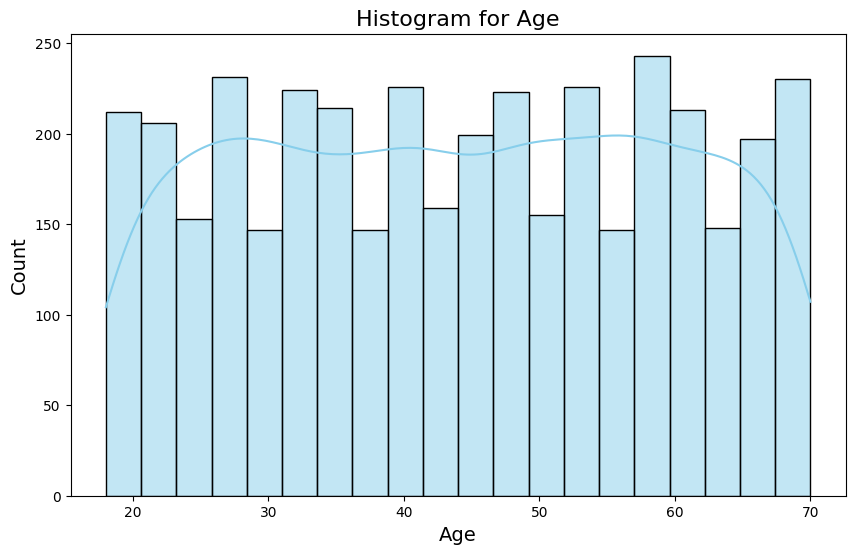

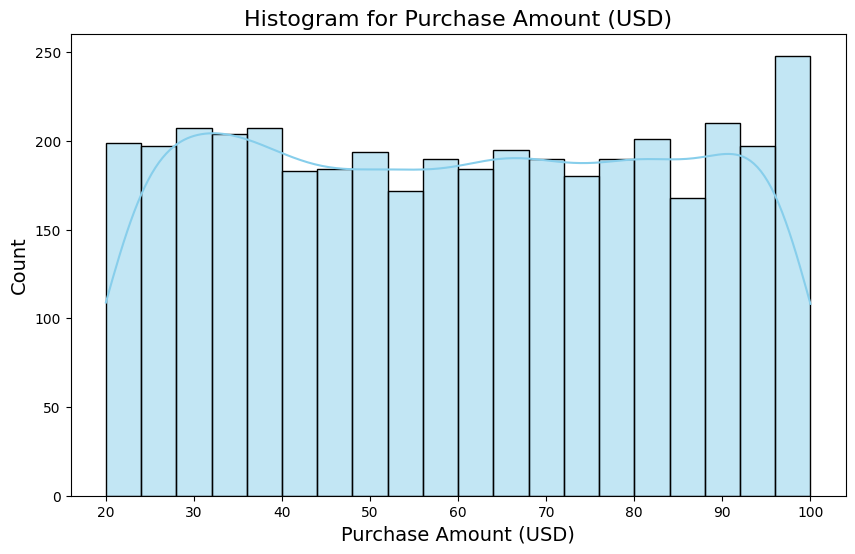

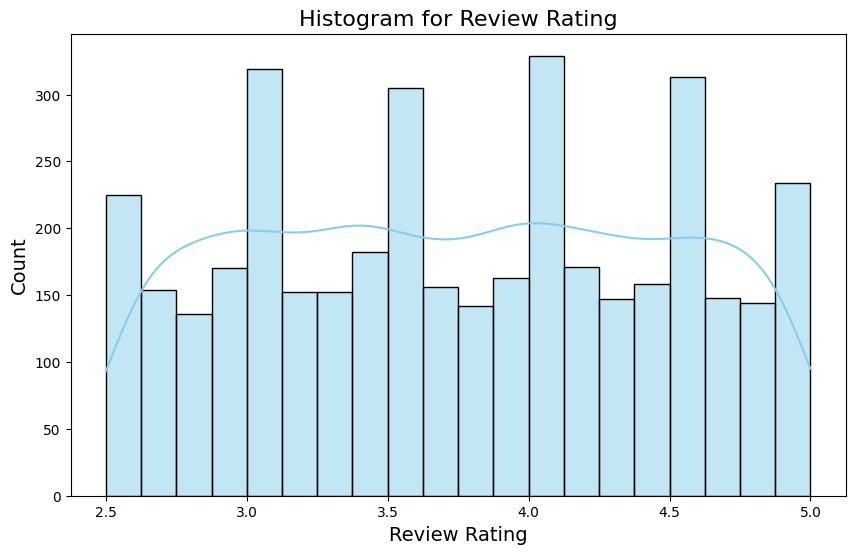

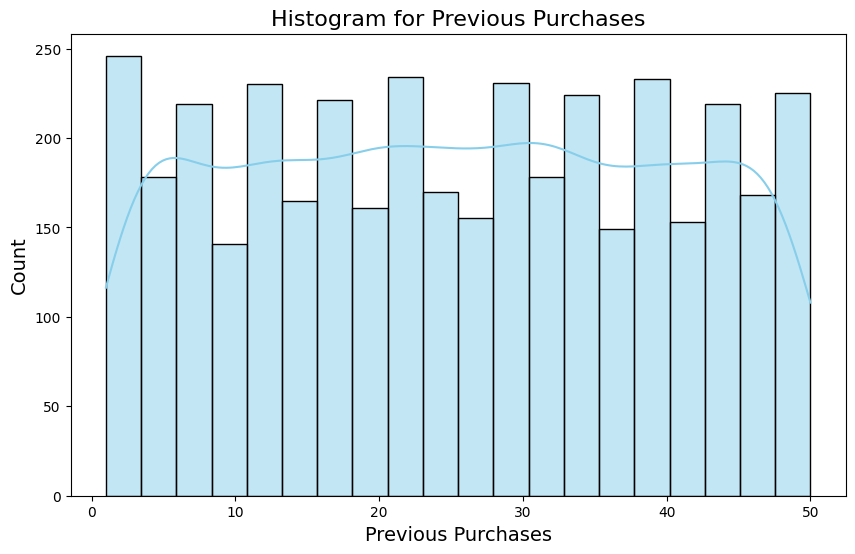

In [11]:
# Loop through each column and draw a histogram
for column in sub_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(sub_df[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

### Correlation Matrix

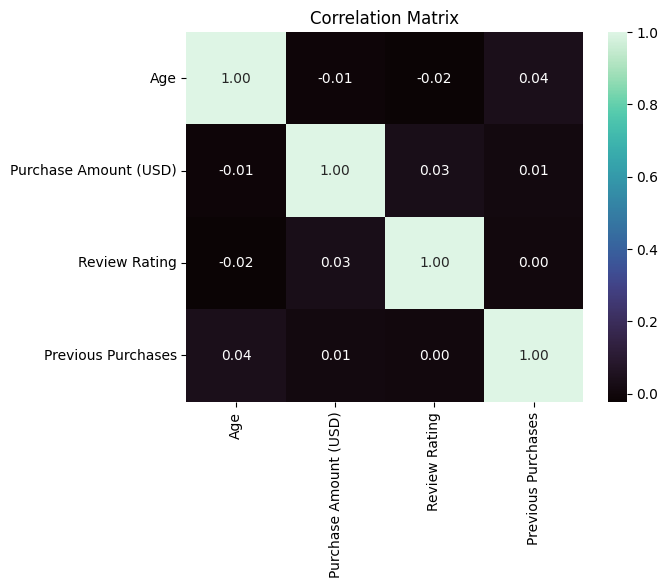

In [12]:
# Plot the heatmap
sns.heatmap(df[cols_numeric].corr(), annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Relation between Columns

In [13]:
from scipy.stats import ks_2samp

# This function basically calculates how different are the distributions
# of different categories in a numerical column

def calculate_stats(col_numeric, col_categorical):

	# Separate the data into two groups based on the categorical column
	group1 = df[df[col_categorical] == df[col_categorical].unique()[0]][col_numeric]
	group2 = df[df[col_categorical] == df[col_categorical].unique()[1]][col_numeric]

	# Perform the Kolmogorov-Smirnov (KS) test
	ks_statistic, p_value = ks_2samp(group1, group2)

	return ks_statistic, p_value

def plot_categorical_distribution(col_numeric, col_categorical):

	# Create side-by-side histograms for the distribution of age between males and females
	plt.figure(figsize=(10, 6))
	sns.histplot(data=df, x=col_numeric, kde=True, hue=col_categorical, multiple='stack', bins=50, palette='husl')
	plt.title(f'Distribution of {col_numeric} for {col_categorical}', fontsize=16)
	plt.xlabel(col_numeric, fontsize=14)
	plt.ylabel('Count', fontsize=14)
	plt.show()

def calculate_stats_and_plot_distribution(col_numeric, col_categorical):

	ks_statistic, p_value = calculate_stats(col_numeric, col_categorical)
	print("ks_statistic:", round(ks_statistic, 4))
	print("p_value:", round(p_value, 4))

	plot_categorical_distribution(col_numeric, col_categorical)

ks_statistic: 0.0247
p_value: 0.67


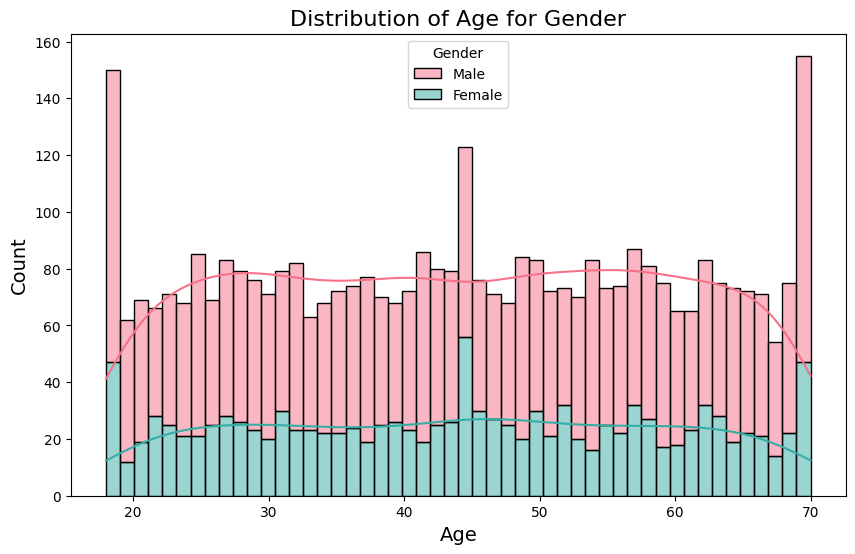

In [14]:
calculate_stats_and_plot_distribution('Age', 'Gender')

ks_statistic: 0.0172
p_value: 0.9589


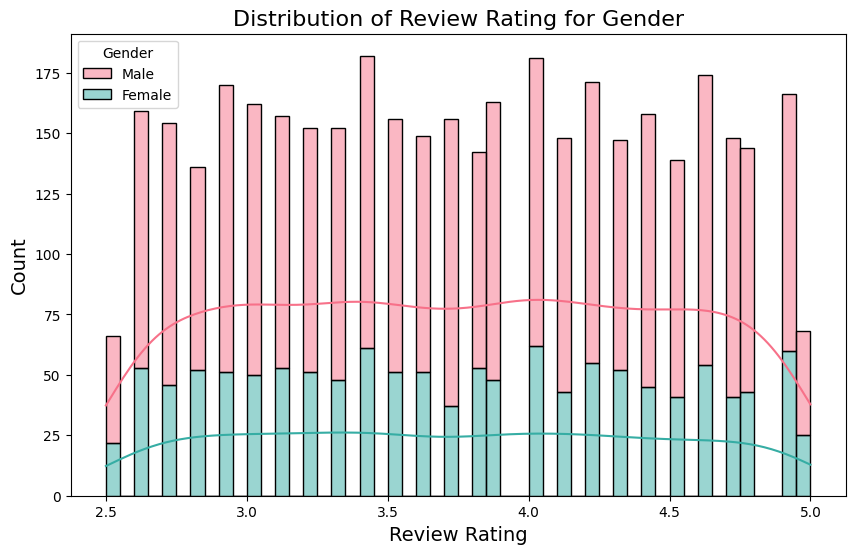

In [15]:
calculate_stats_and_plot_distribution('Review Rating', 'Gender')

ks_statistic: 0.0566
p_value: 0.0084


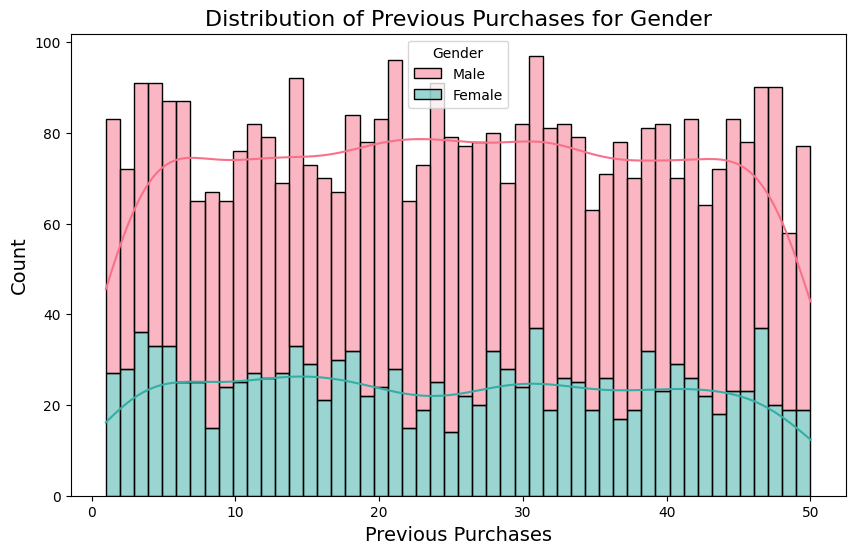

In [16]:
calculate_stats_and_plot_distribution('Previous Purchases', 'Gender')

ks_statistic: 0.0237
p_value: 0.7691


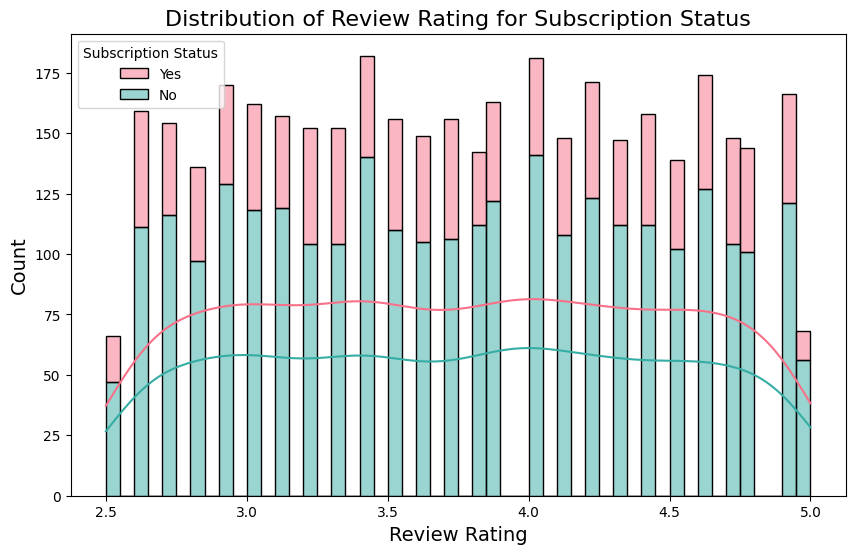

In [17]:
calculate_stats_and_plot_distribution('Review Rating', 'Subscription Status')

ks_statistic: 0.0566
p_value: 0.0084


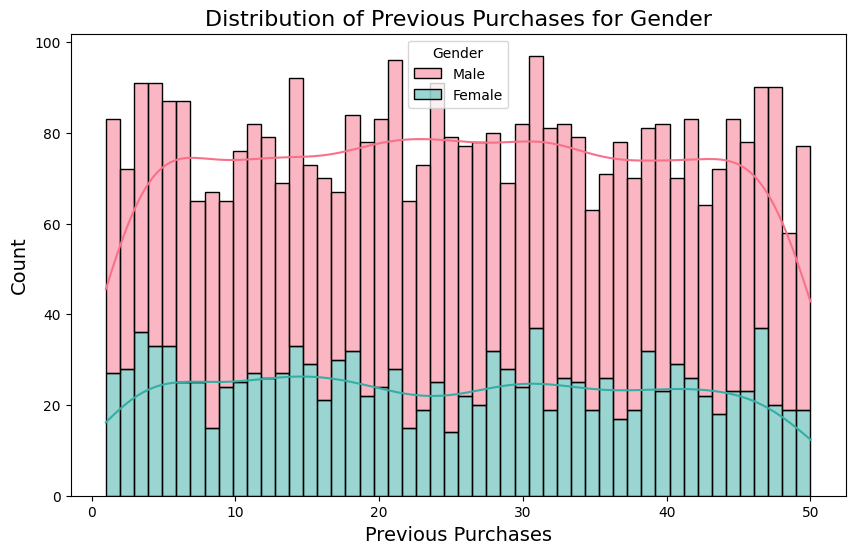

In [18]:
calculate_stats_and_plot_distribution('Previous Purchases', 'Gender')